In [155]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [156]:
df = pd.read_csv("data/dataset.csv",sep=',')
df

,id,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,1,2,0,3,26.783828,48,78,91,1,1
1,1,39,1,4,12,3,25.862694,35,68,80,2,1
2,2,48,0,2,3,2,9.920805,20,67,13,2,0
3,3,34,1,2,5,2,6.407751,36,27,70,3,0
4,4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [157]:
"""Quante sono le istanze contenute nel dataset?"""

'Quante sono le istanze contenute nel dataset?'

In [158]:
print(f'Number of istances: {df.shape[0]}')

Number of istances: 1500


In [159]:
"""Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)?"""

'Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing\nvalues”)?'

In [160]:
print(f'Is there any missing values: {df.isna().any().any()}')

Is there any missing values: False


In [161]:
"""Il dataset è bilanciato per quanto riguarda la classe da predire?"""

'Il dataset è bilanciato per quanto riguarda la classe da predire?'

0    1035
1     465
Name: HiringDecision, dtype: int64


<Axes: xlabel='HiringDecision', ylabel='count'>

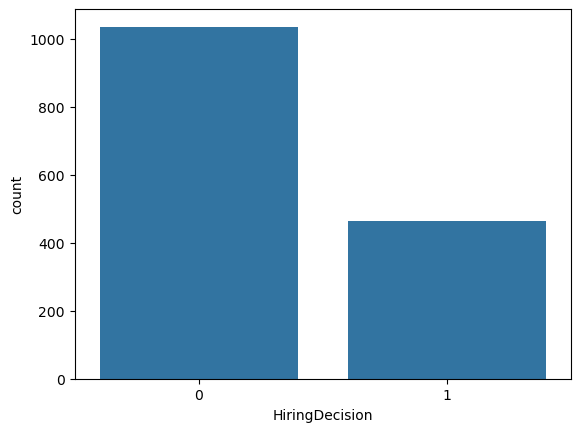

In [162]:
# print(df.groupby(["weather_main"]).size())
print(df["HiringDecision"].value_counts())
sns.countplot(df, x = "HiringDecision")

In [163]:
"""2. Verificare se in generale le persone con la laurea magistrale hanno più probabilità di essere assunti"""

'2. Verificare se in generale le persone con la laurea magistrale hanno più probabilità di essere assunti'

Come possiamo vedere dal grafico le persone dotate di master hanno una probabilità maggiore di essere assunte


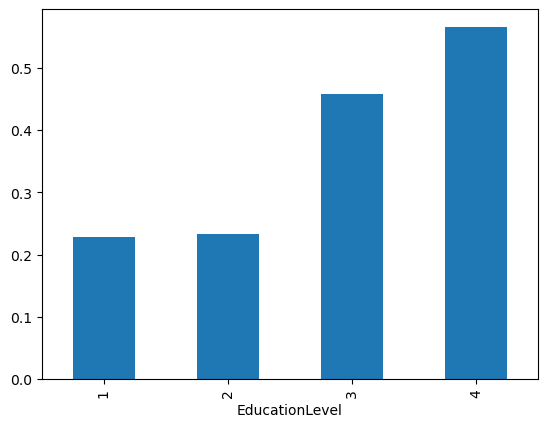

In [164]:
(df[df["HiringDecision"] == 1].groupby(["EducationLevel"]).size() / df.groupby(["EducationLevel"]).size()).plot.bar()
print("Come possiamo vedere dal grafico le persone dotate di master hanno una probabilità maggiore di essere assunte")

In [165]:
"""Realizzare una pivot table attraverso il quale mostrare quanti sono gli uomini/donne con senza laurea magistrale"""

'Realizzare una pivot table attraverso il quale mostrare quanti sono gli uomini/donne con senza laurea magistrale'

In [166]:
degree = [0,2,4]
categories = pd.cut(df['EducationLevel'], degree)
pd.pivot_table(df, 'HiringDecision', index=['Gender'], columns=[categories], aggfunc='count')

EducationLevel,"(0, 2]","(2, 4]"
Gender,,
0,537,225
1,510,228


In [167]:
"""Individuare per ognuna di queste categorie la percentuale di persone assunte"""
pd.pivot_table(df[df["HiringDecision"] == 1], 'HiringDecision', index=['Gender'], columns=[categories], aggfunc='count') / pd.pivot_table(df, 'HiringDecision', index=['Gender'], columns=[categories], aggfunc='count')

EducationLevel,"(0, 2]","(2, 4]"
Gender,,
0,0.249534,0.457778
1,0.213725,0.521930


Non ci sono sostanziali differenze, in assunzioni, tra i due generi


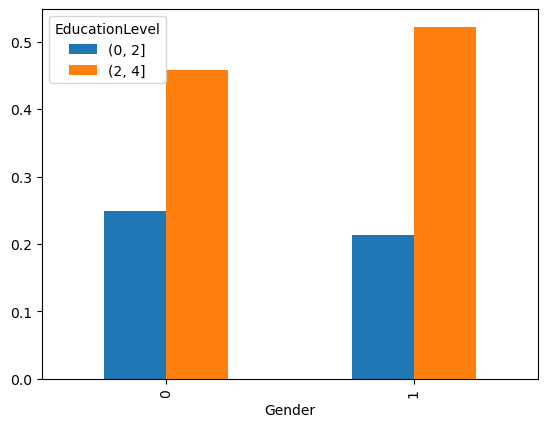

In [168]:
(pd.pivot_table(df[df["HiringDecision"] == 1], 'HiringDecision', index=['Gender'], columns=[categories], aggfunc='count') / pd.pivot_table(df, 'HiringDecision', index=['Gender'], columns=[categories], aggfunc='count')).plot.bar()
print("Non ci sono sostanziali differenze, in assunzioni, tra i due generi")

In [169]:
""" Rappresentare la distribuzione delle età dei candidati"""

' Rappresentare la distribuzione delle età dei candidati'

<Axes: ylabel='Frequency'>

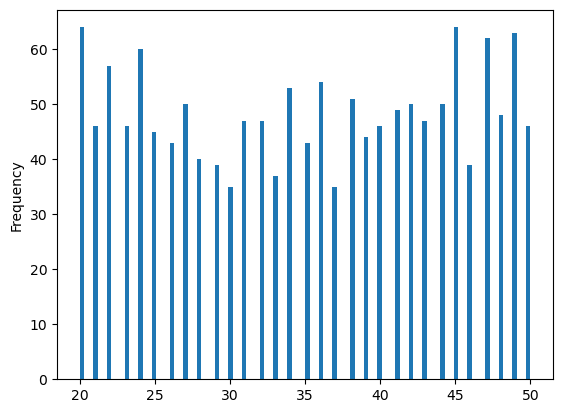

In [170]:
df['Age'].plot.hist(bins=100)

In [171]:
categories = pd.cut(df['Age'], bins=5)
# pd.pivot_table(df[df["HiringDecision"] == 1], 'HiringDecision', index=[categories], aggfunc='count') 
pd.pivot_table(df[df["HiringDecision"] == 1], 'HiringDecision', index=[categories], aggfunc='count') / 1500
# Meglio guardare hai valore percentuali

,HiringDecision
Age,
"(19.97, 26.0]",0.074667
"(26.0, 32.0]",0.056667
"(32.0, 38.0]",0.052000
"(38.0, 44.0]",0.060000
"(44.0, 50.0]",0.066667


Come si evince dal grafico sottostante, la categoria 20-26 è quella in cui, in percentuale, ci sono più assunzioni
Possiamo quindi dire che si assumono più giovani


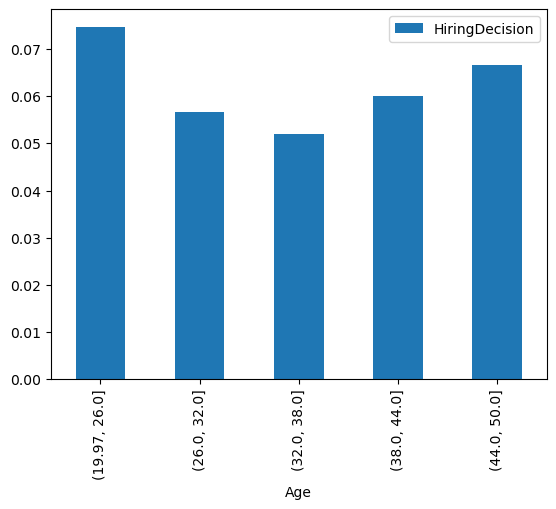

In [172]:

(pd.pivot_table(df[df["HiringDecision"] == 1], 'HiringDecision', index=[categories], aggfunc='count') / 1500).plot.bar()
print("Come si evince dal grafico sottostante, la categoria 20-26 è quella in cui, in percentuale, ci sono più assunzioni")
print("Possiamo quindi dire che si assumono più giovani")

In [173]:
"Verificare quale strategia di assunzione è stata più efficace"

'Verificare quale strategia di assunzione è stata più efficace'

In [174]:
df[df['HiringDecision'] == 1].groupby(['RecruitmentStrategy']).size()

RecruitmentStrategy
1    319
2    105
3     41
dtype: int64

La strategia numero 1, come si evince chiaramente dal grafico, è stata quella più efficace


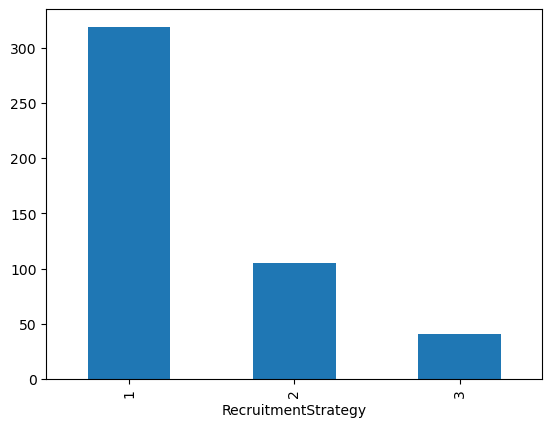

In [175]:
df[df['HiringDecision'] == 1].groupby(['RecruitmentStrategy']).size().plot.bar()
print("La strategia numero 1, come si evince chiaramente dal grafico, è stata quella più efficace")

In [176]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [177]:
"""1. Si vuole predire se un candidato verrà assunto"""

'1. Si vuole predire se un candidato verrà assunto'

In [178]:
df = pd.read_csv("data/dataset.csv",sep=',')
df

,id,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,1,2,0,3,26.783828,48,78,91,1,1
1,1,39,1,4,12,3,25.862694,35,68,80,2,1
2,2,48,0,2,3,2,9.920805,20,67,13,2,0
3,3,34,1,2,5,2,6.407751,36,27,70,3,0
4,4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [179]:
df = df.drop(columns=["id"]) # rimuovo l'id perchè è dato duplicato ed inutile alla predizione
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [180]:
df = df.dropna()
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [181]:
y = df["HiringDecision"]
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [182]:
X = df.loc[:,'Age':'RecruitmentStrategy']
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

Accuracy with decision tree:
accuracy on train: 0.7768888888888889
accuracy on test: 0.72


<Axes: >

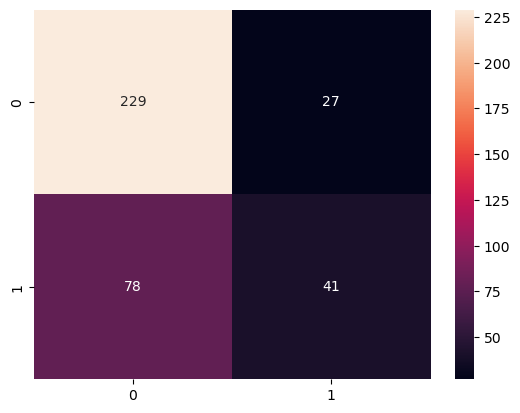

In [184]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result = knn.predict(X_train)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = knn.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

Accuracy with SGS:
accuracy on train: 0.7244444444444444
accuracy on test: 0.712


<Axes: >

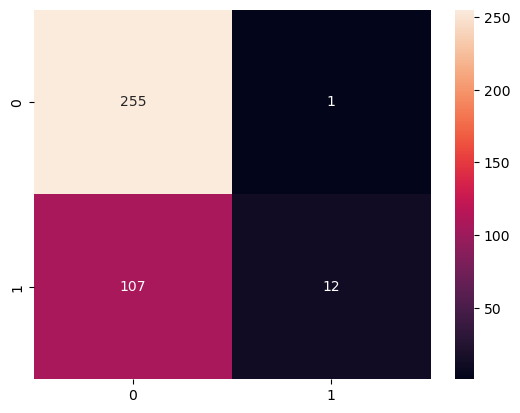

In [185]:
# SGD
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

result = sgd.predict(X_train)
print("Accuracy with SGS:")
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = sgd.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

Accuracy with Dummy Classifier:
accuracy on train: 0.6924444444444444
accuracy on test: 0.6826666666666666


<Axes: >

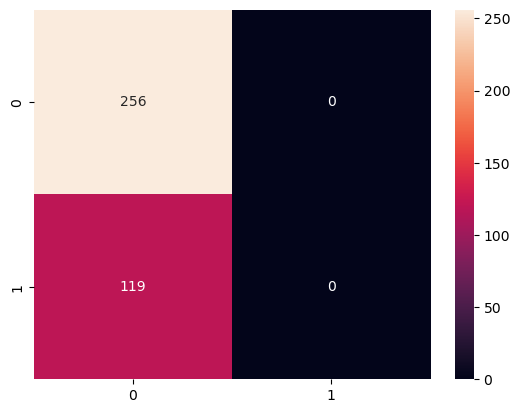

In [186]:
# Dummy
dclf = DummyClassifier()
dclf.fit(X_train, y_train)

print("Accuracy with Dummy Classifier:")

result = dclf.predict(X_train)
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = dclf.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [187]:
"""Probabilità uguale su uomini e donne?"""

'Probabilità uguale su uomini e donne?'

In [188]:
X_test

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
1174,28,0,1,9,1,29.325908,56,58,46,2
922,28,0,2,3,3,2.411438,13,2,92,2
277,36,1,4,5,3,9.783605,1,54,96,1
1252,37,0,2,1,4,9.460153,77,62,18,2
478,39,0,2,10,5,12.620202,9,73,27,2
...,...,...,...,...,...,...,...,...,...,...
1357,29,1,2,2,2,9.766712,90,72,90,2
835,29,0,2,11,4,30.111872,70,40,62,2
1277,44,1,2,3,1,34.543244,91,14,50,1
797,44,1,2,10,2,21.685302,82,25,86,2


In [189]:
y_test

1174    0
922     0
277     1
1252    0
478     0
       ..
1357    0
835     0
1277    0
797     0
921     1
Name: HiringDecision, Length: 375, dtype: int64

In [190]:
men = X_test[X_test["Gender"] == 0]

women = X_test[X_test["Gender"] == 1]


In [191]:
women

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
277,36,1,4,5,3,9.783605,1,54,96,1
618,20,1,4,9,2,37.841323,76,27,27,1
889,32,1,1,15,5,36.104128,100,76,97,2
1142,43,1,3,7,2,32.917503,50,92,17,1
1365,21,1,3,9,1,16.559737,60,8,47,1
...,...,...,...,...,...,...,...,...,...,...
1200,41,1,3,12,2,1.109207,59,5,54,3
1357,29,1,2,2,2,9.766712,90,72,90,2
1277,44,1,2,3,1,34.543244,91,14,50,1
797,44,1,2,10,2,21.685302,82,25,86,2


In [192]:
men

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
1174,28,0,1,9,1,29.325908,56,58,46,2
922,28,0,2,3,3,2.411438,13,2,92,2
1252,37,0,2,1,4,9.460153,77,62,18,2
478,39,0,2,10,5,12.620202,9,73,27,2
231,49,0,2,5,2,48.697261,40,11,70,2
...,...,...,...,...,...,...,...,...,...,...
780,28,0,2,11,2,40.568146,78,24,18,2
1390,30,0,2,0,2,45.602943,34,11,90,2
387,30,0,2,1,4,38.529923,29,40,52,3
541,42,0,3,12,3,6.160832,73,75,36,2


In [193]:
y_test_women = y_test[women.index]
y_test_women

277     1
618     1
889     1
1142    1
1365    1
       ..
1200    0
1357    0
1277    0
797     0
921     1
Name: HiringDecision, Length: 199, dtype: int64

In [194]:
y_test_men = y_test[men.index]
y_test_men

1174    0
922     0
1252    0
478     0
231     0
       ..
780     0
1390    1
387     0
541     1
835     0
Name: HiringDecision, Length: 176, dtype: int64

In [195]:
prob = knn.predict_proba(men)
print(f'probability on men: {prob.mean()}')

prob = knn.predict_proba(women)
print(f'probability on women: {prob.mean()}')

probability on men: 0.5
probability on women: 0.5


In [196]:
result = knn.predict(men)
print(f'accuracy on men: {accuracy_score(y_test_men,result)}')

result = knn.predict(women)
print(f'accuracy on women: {accuracy_score(y_test_women,result)}')

accuracy on men: 0.7272727272727273
accuracy on women: 0.7135678391959799


In [197]:
"Remove gender"

'Remove gender'

In [198]:
df = pd.read_csv("data/dataset.csv",sep=',')
df = df.dropna()
df = df.drop(columns=["id"]) # rimuovo l'id perchè è dato duplicato ed inutile alla predizione
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [199]:
y = df['HiringDecision']
df = df.drop(columns=['HiringDecision'])
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [200]:
X = df.loc[:,'Age':'RecruitmentStrategy']
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [201]:
X = X.drop(columns=['Gender'])
X

,Age,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,2,0,3,26.783828,48,78,91,1
1,39,4,12,3,25.862694,35,68,80,2
2,48,2,3,2,9.920805,20,67,13,2
3,34,2,5,2,6.407751,36,27,70,3
4,30,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...
1495,48,2,3,4,9.183783,66,3,80,3
1496,27,2,10,3,14.847731,43,97,7,2
1497,24,1,1,2,4.289911,31,91,58,1
1498,48,2,4,4,36.299263,9,37,44,2


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [203]:
men = men.drop(columns=['Gender'])
women = women.drop(columns=['Gender'])

In [204]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result = knn.predict(men)
print(f'accuracy on men: {accuracy_score(y_test_men,result)}')

result = knn.predict(women)
print(f'accuracy on women: {accuracy_score(y_test_women,result)}')

accuracy on men: 0.7784090909090909
accuracy on women: 0.7738693467336684


In [205]:
print("L'accuratezza è simile dopo aver eliminato la feature gender")

L'accuratezza non cambia anche dopo aver eliminato la feature gender


In [206]:
"""punto 3."""

'punto 3.'

In [207]:
df = pd.read_csv("data/dataset.csv",sep=',')
df = df.drop(columns=['id'])
df = df.dropna()
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [208]:
y = df['HiringDecision']
df = df.drop(columns=['HiringDecision'])
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [209]:
df['MeanScore'] = (df['InterviewScore'] + df['SkillScore'] + df['PersonalityScore']) / 3
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,MeanScore
0,26,1,2,0,3,26.783828,48,78,91,1,72.333333
1,39,1,4,12,3,25.862694,35,68,80,2,61.000000
2,48,0,2,3,2,9.920805,20,67,13,2,33.333333
3,34,1,2,5,2,6.407751,36,27,70,3,44.333333
4,30,0,1,6,1,43.105343,23,52,85,2,53.333333
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,49.666667
1496,27,1,2,10,3,14.847731,43,97,7,2,49.000000
1497,24,1,1,1,2,4.289911,31,91,58,1,60.000000
1498,48,0,2,4,4,36.299263,9,37,44,2,30.000000


In [210]:
X = df.loc[:,'Age':'MeanScore']
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,MeanScore
0,26,1,2,0,3,26.783828,48,78,91,1,72.333333
1,39,1,4,12,3,25.862694,35,68,80,2,61.000000
2,48,0,2,3,2,9.920805,20,67,13,2,33.333333
3,34,1,2,5,2,6.407751,36,27,70,3,44.333333
4,30,0,1,6,1,43.105343,23,52,85,2,53.333333
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,49.666667
1496,27,1,2,10,3,14.847731,43,97,7,2,49.000000
1497,24,1,1,1,2,4.289911,31,91,58,1,60.000000
1498,48,0,2,4,4,36.299263,9,37,44,2,30.000000


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

Accuracy with decision tree:
accuracy on train: 0.7973333333333333
accuracy on test: 0.664
L'accuretezza è leggermente migliorata


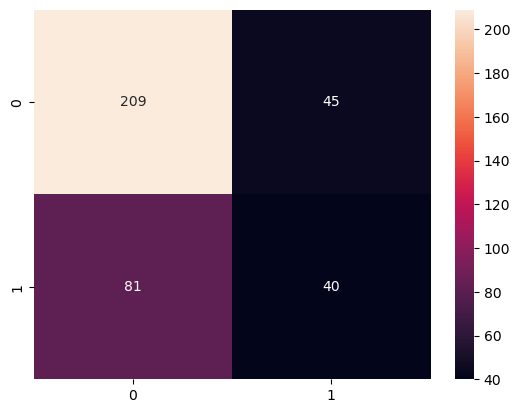

In [212]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result = knn.predict(X_train)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = knn.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")
print("L'accuretezza è leggermente migliorata")

In [213]:
"Elimina colonne relative allo score"

'Elimina colonne relative allo score'

In [214]:
X = X.drop(columns=['InterviewScore','SkillScore','PersonalityScore'])
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,RecruitmentStrategy,MeanScore
0,26,1,2,0,3,26.783828,1,72.333333
1,39,1,4,12,3,25.862694,2,61.000000
2,48,0,2,3,2,9.920805,2,33.333333
3,34,1,2,5,2,6.407751,3,44.333333
4,30,0,1,6,1,43.105343,2,53.333333
...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,3,49.666667
1496,27,1,2,10,3,14.847731,2,49.000000
1497,24,1,1,1,2,4.289911,1,60.000000
1498,48,0,2,4,4,36.299263,2,30.000000


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

Accuracy with decision tree:
accuracy on train: 0.7804444444444445
accuracy on test: 0.672
L'accuretezza non è migliorata


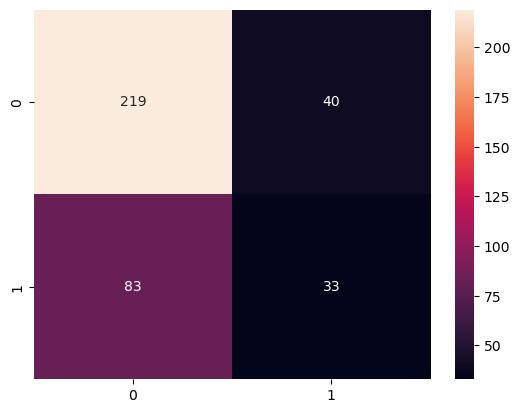

In [216]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

result = knn.predict(X_train)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = knn.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")
print("L'accuretezza non è migliorata")

In [217]:
"""Trovare parametri migliori"""

'Trovare parametri migliori'

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
parameters = {
    'n_neighbors': [2,5,10],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(knn, parameters, cv=10, n_jobs=-1, scoring= 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [220]:
clf.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

Accuracy with decision tree:
accuracy on train: 0.808
accuracy on test: 0.6933333333333334
L'accuretezza è migliorata


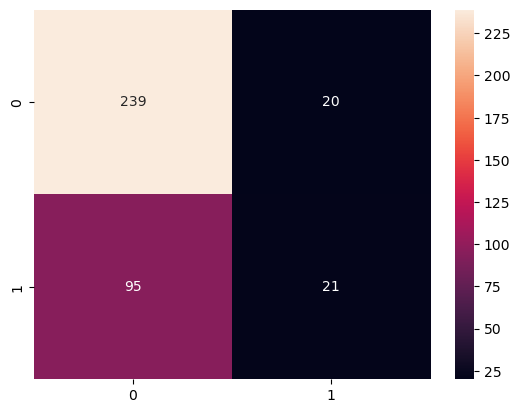

In [221]:
knn = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'], weights=clf.best_params_['weights'])
knn.fit(X_train, y_train)

result = knn.predict(X_train)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, result)}')

result = knn.predict(X_test)
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")
print("L'accuretezza è migliorata")

In [222]:
"""Pipeline punto 5"""

'Pipeline punto 5'

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion, FunctionTransformer
from sklearn import preprocessing

In [224]:
df = pd.read_csv("data/dataset.csv",sep=',')
df = df.drop(columns=['id'])
df = df.dropna()
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [225]:
y = df['HiringDecision']
df = df.drop(columns=['HiringDecision'])
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [226]:
X = df.loc[:,'Age':'RecruitmentStrategy']
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [228]:

model_pipeline = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'], weights=clf.best_params_['weights'])

def identity(X):
  return X


Identity = FunctionTransformer(identity, validate=True)

discretizer = ColumnTransformer([("InterviewScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["InterviewScore"]),
                                 ("SkillScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["SkillScore"]),
                                 ("PersonalityScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["PersonalityScore"]),
                                 ])
scaler = ColumnTransformer([("ExperienceYears", preprocessing.MinMaxScaler((0,1)), ["ExperienceYears"])])

union = FeatureUnion([("discretizer", discretizer),
                      ('scaler',scaler),
                      ("allelse", Identity)])


my_pipeline = Pipeline(steps=[('preprocessing',union),
                              ('model',model_pipeline)])
my_pipeline

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('discretizer',
                                                 ColumnTransformer(transformers=[('InterviewScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['InterviewScore']),
                                                                                 ('SkillScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['SkillScore']),
                                                                                 ('PersonalityScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['PersonalityScore'])])),
                                                ('scaler',
                                                 ColumnTransformer(transformers=[('ExperienceYears',
                                                                                  MinMaxScaler(),
                                                                                  ['ExperienceYears'])])),
                                                ('allelse',
                                                 FunctionTransformer(func=<function identity at 0x77a76d1274c0>,
                                                                     validate=True))])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

In [229]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

0.704

In [230]:
""""Punto 6"""

'"Punto 6'

In [231]:
df = pd.read_csv("data/dataset.csv",sep=',')
df = df.drop(columns=['id'])
df = df.dropna()
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [232]:
y = df['HiringDecision']
df = df.drop(columns=['HiringDecision'])
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [233]:
X = df.loc[:,'Age':'RecruitmentStrategy']
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [235]:
model_pipeline = KNeighborsClassifier()

def identity(X):
  return X


Identity = FunctionTransformer(identity, validate=True)

discretizer = ColumnTransformer([("InterviewScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["InterviewScore"]),
                                 ("SkillScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["SkillScore"]),
                                 ("PersonalityScore", preprocessing.KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["PersonalityScore"]),
                                 ])
scaler = ColumnTransformer([("ExperienceYears", preprocessing.MinMaxScaler((0,1)), ["ExperienceYears"])])

union = FeatureUnion([("discretizer", discretizer),
                      ('scaler',scaler),
                      ("allelse", Identity)])


my_pipeline = Pipeline(steps=[('preprocessing',union),
                              ('selectkbest',SelectKBest()),
                              ('model',model_pipeline)])
my_pipeline

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('discretizer',
                                                 ColumnTransformer(transformers=[('InterviewScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['InterviewScore']),
                                                                                 ('SkillScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['SkillScore']),
                                                                                 ('PersonalityScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   strategy='uniform'),
                                                                                  ['PersonalityScore'])])),
                                                ('scaler',
                                                 ColumnTransformer(transformers=[('ExperienceYears',
                                                                                  MinMaxScaler(),
                                                                                  ['ExperienceYears'])])),
                                                ('allelse',
                                                 FunctionTransformer(func=<function identity at 0x77a76d2ce480>,
                                                                     validate=True))])),
                ('selectkbest', SelectKBest()),
                ('model', KNeighborsClassifier())])

In [236]:
parameters = {
    'selectkbest__k': [2,5,10],
    'preprocessing__discretizer__InterviewScore__n_bins': [3,5,7],
    'preprocessing__discretizer__SkillScore__n_bins': [3,5,7],
    'preprocessing__discretizer__PersonalityScore__n_bins': [3,5,7],
    'model__n_neighbors': [2,5,10],
    'model__weights': ['uniform', 'distance']
}

clf = GridSearchCV(my_pipeline, parameters, cv=10, n_jobs=-1, scoring= 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('discretizer',
                                                                        ColumnTransformer(transformers=[('InterviewScore',
                                                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                                                          strategy='uniform'),
                                                                                                         ['InterviewScore']),
                                                                                                        ('SkillScore',
                                                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                                                          strategy='uniform'),
                                                                                                         ['SkillScore']),
                                                                                                        ('PersonalityScore',
                                                                                                         KBinsDiscretiz...
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [2, 5, 10],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessing__discretizer__InterviewScore__n_bins': [3,
                                                                                5,
                                                                                7],
                         'preprocessing__discretizer__PersonalityScore__n_bins': [3,
                                                                                  5,
                                                                                  7],
                         'preprocessing__discretizer__SkillScore__n_bins': [3,
                                                                            5,
                                                                            7],
                         'selectkbest__k': [2, 5, 10]},
             scoring='accuracy')

In [237]:
clf.best_params_

{'model__n_neighbors': 5,
 'model__weights': 'uniform',
 'preprocessing__discretizer__InterviewScore__n_bins': 3,
 'preprocessing__discretizer__PersonalityScore__n_bins': 3,
 'preprocessing__discretizer__SkillScore__n_bins': 3,
 'selectkbest__k': 2}

In [238]:
my_pipeline.set_params(**clf.best_params_)

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('discretizer',
                                                 ColumnTransformer(transformers=[('InterviewScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=3,
                                                                                                   strategy='uniform'),
                                                                                  ['InterviewScore']),
                                                                                 ('SkillScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=3,
                                                                                                   strategy='uniform'),
                                                                                  ['SkillScore']),
                                                                                 ('PersonalityScore',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=3,
                                                                                                   strategy='uniform'),
                                                                                  ['PersonalityScore'])])),
                                                ('scaler',
                                                 ColumnTransformer(transformers=[('ExperienceYears',
                                                                                  MinMaxScaler(),
                                                                                  ['ExperienceYears'])])),
                                                ('allelse',
                                                 FunctionTransformer(func=<function identity at 0x77a76d2ce480>,
                                                                     validate=True))])),
                ('selectkbest', SelectKBest(k=2)),
                ('model', KNeighborsClassifier())])

In [239]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
print(accuracy_score(y_test, preds))
print("L'accuratezza è migliorata notevolmente: quasi il 10%")

0.7493333333333333
L'accuratezza è migliorata notevolmente: quasi il 10%
